<a href="https://colab.research.google.com/github/revatishelat/DST_A2/blob/main/Ethan/BERT_medical_abstracts.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

https://www.techtarget.com/searchenterpriseai/definition/BERT-language-model

https://huggingface.co/blog/bert-101

https://arxiv.org/pdf/1904.08398.pdf

https://www.tensorflow.org/text/tutorials/classify_text_with_bert

https://towardsdatascience.com/bert-explained-state-of-the-art-language-model-for-nlp-f8b21a9b6270

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
url = 'https://raw.githubusercontent.com/sebischair/Medical-Abstracts-TC-Corpus/main/medical_tc_train.csv'
df1 = pd.read_csv(url)

In [ ]:
df1.head()

,condition_label,medical_abstract
0,5,Tissue changes around loose prostheses. A cani...
1,1,Neuropeptide Y and neuron-specific enolase lev...
2,2,"Sexually transmitted diseases of the colon, re..."
3,1,Lipolytic factors associated with murine and h...
4,3,Does carotid restenosis predict an increased r...


In [ ]:
X = df1['medical_abstract']
y = df1['condition_label']

In [ ]:
import re

# EDA

*   Analyse how many contain numbers
*   Do word cloud for each class




In [ ]:
def contains_number(input_string):
    # Define a regular expression pattern to match any digit
    pattern = re.compile(r'\d')

    # Use the search method to check if the pattern is present in the input string
    match = re.search(pattern, input_string)

    # Return True if a match is found, indicating the presence of a number
    return bool(match)

In [ ]:
totals = np.zeros(5)
contains_number_sums = np.zeros(5)
for i in range(len(df1)):
  label, text = list(df1.iloc[i])
  if contains_number(text):
    contains_number_sums[label-1] += 1
  totals[label-1] += 1

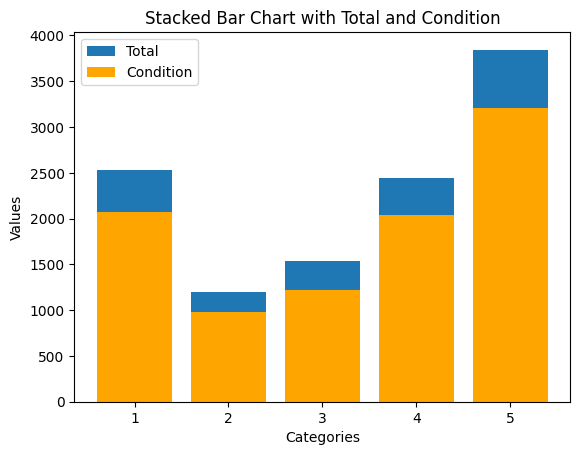

In [ ]:
categories = [1,2,3,4,5]
x = 5
total_values = totals
condition_values = contains_number_sums

# Create a stacked bar chart
fig, ax = plt.subplots()
bar1 = ax.bar(categories, total_values, label='Total')
bar2 = ax.bar(categories, condition_values, label='Condition', color='orange')

# Add labels, title, and legend
ax.set_xlabel('Categories')
ax.set_ylabel('Values')
ax.set_title('Stacked Bar Chart with Total and Condition')
ax.legend()

# Show the plot
plt.show()

# Preprocessing steps

In [ ]:
import nltk
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
from nltk.stem import WordNetLemmatizer

In [ ]:
print(nltk.word_tokenize(X[0]))

['Tissue', 'changes', 'around', 'loose', 'prostheses', '.', 'A', 'canine', 'model', 'to', 'investigate', 'the', 'effects', 'of', 'an', 'antiinflammatory', 'agent', '.', 'The', 'aseptically', 'loosened', 'prosthesis', 'provided', 'a', 'means', 'for', 'investigating', 'the', 'in', 'vivo', 'and', 'in', 'vitro', 'activity', 'of', 'the', 'cells', 'associated', 'with', 'the', 'loosening', 'process', 'in', 'seven', 'dogs', '.', 'The', 'cells', 'were', 'isolated', 'and', 'maintained', 'in', 'culture', 'for', 'sufficient', 'periods', 'of', 'time', 'so', 'that', 'their', 'biologic', 'activity', 'could', 'be', 'studied', 'as', 'well', 'as', 'the', 'effect', 'of', 'different', 'agents', 'added', 'to', 'the', 'cells', 'in', 'vivo', 'or', 'in', 'vitro', '.', 'The', 'biologic', 'response', 'as', 'determined', 'by', 'interleukin-1', 'and', 'prostaglandin', 'E2', 'activity', 'paralleled', 'the', 'roentgenographic', 'appearance', 'of', 'loosening', 'and', 'the', 'technetium', 'images', 'and', 'observati

In [ ]:
# Lowercase it
X.str.lower()

0        tissue changes around loose prostheses. a cani...
1        neuropeptide y and neuron-specific enolase lev...
2        sexually transmitted diseases of the colon, re...
3        lipolytic factors associated with murine and h...
4        does carotid restenosis predict an increased r...
                               ...                        
11545    epirubicin at two dose levels with prednisolon...
11546    four and a half year follow up of women with d...
11547    safety of the transbronchial biopsy in outpati...
11548    interictal spikes and hippocampal somatostatin...
11549    recurrent thoracic outlet syndrome after first...
Name: medical_abstract, Length: 11550, dtype: object

In [ ]:
# Remove words of small length

In [ ]:
en_stop = set(nltk.corpus.stopwords.words('english'))

In [ ]:
# Remove stop words

In [ ]:
# Lemmatize
WordNetLemmatizer().lemmatize

<bound method WordNetLemmatizer.lemmatize of <WordNetLemmatizer>>

In [ ]:
for x in X:
  if 'ABSTRACT' in x:
    example = x
    print(x)
    break

In vitro and in vivo effects within the coronary sinus of nonarcing and arcing shocks using a new system of low-energy DC ablation. DC shocks within the coronary sinus have been abandoned because of the risk of cardiac rupture and tamponade. Catheter ablation using DC energy to electrodes straddling the ostium of the coronary sinus, when used clinically, has been reported to result in cardiac tamponade in as many as 16% of patients. A new system of energy delivery maximizes voltage while decreasing the undesirable effects caused by barotrauma. This system includes 1) a low-energy ablation power supply with a brief time-constant capacitive discharge that delivers up to 40 J and 3,000 V and 2) a low-energy ablation catheter with a contoured distal electrode. We performed in vitro and in vivo studies of this new system and compared arcing shocks with nonarcing shocks. Ablations were performed using unipolar distal shocks (D) and unipolar shocks to both electrodes made electrically common 

In [ ]:
substring_to_remove = '(ABSTRACT TRUNCATED AT 400 WORDS).'

result_string = re.sub(re.escape(substring_to_remove), '', example)
print(result_string)

In vitro and in vivo effects within the coronary sinus of nonarcing and arcing shocks using a new system of low-energy DC ablation. DC shocks within the coronary sinus have been abandoned because of the risk of cardiac rupture and tamponade. Catheter ablation using DC energy to electrodes straddling the ostium of the coronary sinus, when used clinically, has been reported to result in cardiac tamponade in as many as 16% of patients. A new system of energy delivery maximizes voltage while decreasing the undesirable effects caused by barotrauma. This system includes 1) a low-energy ablation power supply with a brief time-constant capacitive discharge that delivers up to 40 J and 3,000 V and 2) a low-energy ablation catheter with a contoured distal electrode. We performed in vitro and in vivo studies of this new system and compared arcing shocks with nonarcing shocks. Ablations were performed using unipolar distal shocks (D) and unipolar shocks to both electrodes made electrically common 

Keep acronyms as contain useful info (like AIDS)
Maybe do different pipeline for BERT to remove acronyms if needed

# Trying BERT

In [ ]:
!pip3 install --quiet tensorflow-text

import numpy as np
import tensorflow as tf
import tensorflow_hub as hub
import tensorflow_text as text  # Imports TF ops for preprocessing.

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.2/5.2 MB 15.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 475.2/475.2 MB 1.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 3.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 442.0/442.0 kB 3.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 4.0 MB/s eta 0:00:00


In [ ]:
len(list(df1['medical_abstract']))

11550

In [ ]:
# Load the BERT encoder and preprocessing models
preprocess = hub.load('https://kaggle.com/models/tensorflow/bert/frameworks/TensorFlow2/variations/en-uncased-preprocess/versions/3')
bert = hub.load('https://www.kaggle.com/models/google/experts-bert/frameworks/TensorFlow2/variations/pubmed/versions/2')

sentences = list(df1['medical_abstract'])

# Convert the sentences to bert inputs
bert_inputs = preprocess(sentences[0:1])

# Feed the inputs to the model to get the pooled and sequence outputs
bert_outputs = bert(bert_inputs, training=False)
pooled_output = bert_outputs['pooled_output']
sequence_output = bert_outputs['sequence_output']

print('\nSentences:')
print(sentences)
print('\nPooled output:')
print(pooled_output)
print('\nSequence output:')
print(sequence_output)

InvalidArgumentError: ignored

In [ ]:
sentences[0:1]

['Tissue changes around loose prostheses. A canine model to investigate the effects of an antiinflammatory agent. The aseptically loosened prosthesis provided a means for investigating the in vivo and in vitro activity of the cells associated with the loosening process in seven dogs. The cells were isolated and maintained in culture for sufficient periods of time so that their biologic activity could be studied as well as the effect of different agents added to the cells in vivo or in vitro. The biologic response as determined by interleukin-1 and prostaglandin E2 activity paralleled the roentgenographic appearance of loosening and the technetium images and observations made at the time of revision surgery. The correlation between clinical, roentgenographic, histologic, and biochemical loosening indicates that the canine model is suitable for investigating the mechanisms of prosthetic failure. A canine model permits the study of possible nonsurgical therapeutic interventions with the u

https://colab.research.google.com/github/jalammar/jalammar.github.io/blob/master/notebooks/bert/A_Visual_Notebook_to_Using_BERT_for_the_First_Time.ipynb

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
import torch
import transformers as ppb
import warnings
warnings.filterwarnings('ignore')

In [ ]:
# For DistilBERT:
model_class, tokenizer_class, pretrained_weights = (ppb.DistilBertModel, ppb.DistilBertTokenizer, 'distilbert-base-uncased')

## Want BERT instead of distilBERT? Uncomment the following line:
#model_class, tokenizer_class, pretrained_weights = (ppb.BertModel, ppb.BertTokenizer, 'bert-base-uncased')

# Load pretrained model/tokenizer
tokenizer = tokenizer_class.from_pretrained(pretrained_weights)
model = model_class.from_pretrained(pretrained_weights)

tokenizer_config.json:   0%|          | 0.00/28.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/483 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/268M [00:00<?, ?B/s]

In [ ]:
tokenized = df1['medical_abstract'].apply((lambda x: tokenizer.encode(x, add_special_tokens=True)))

Token indices sequence length is longer than the specified maximum sequence length for this model (631 > 512). Running this sequence through the model will result in indexing errors


In [ ]:
max_len = 0
for i in tokenized.values:
    if len(i) > max_len:
        max_len = len(i)

padded = np.array([i + [0]*(max_len-len(i)) for i in tokenized.values])

In [ ]:
np.array(padded).shape

(11550, 836)

In [ ]:
attention_mask = np.where(padded != 0, 1, 0)
attention_mask.shape

(11550, 836)

In [ ]:
input_ids = torch.tensor(padded)
attention_mask = torch.tensor(attention_mask)

with torch.no_grad():
    last_hidden_states = model(input_ids, attention_mask=attention_mask)

In [ ]:
features = last_hidden_states[0][:,0,:].numpy()

https://www.kaggle.com/code/kerneler/bert-experts-from-tf-hub
https://www.kaggle.com/models/google/experts-bert